In [339]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [340]:
import warnings
warnings.filterwarnings("ignore")

# DATA DESCRIPTION

In [341]:
data_description = pd.read_csv('data_information.csv', names=['Name', 'Description'])
data_description

,Name,Description
0,age,age in years
1,sex,sex (1 = male; 0 = female)
2,cp,chest pain type; Value 1: typical angina Value...
3,trestbps,resting blood pressure (in mm Hg on admission ...
4,chol,serum cholestoral in mg/dl
5,fbs,fasting blood sugar > 120 mg/dl (1 = true; 0 =...
6,restecg,resting electrocardiographic results; Value 0:...
7,thalach,maximum heart rate achieved
8,exang,exercise induced angina (1 = yes; 0 = no)
9,oldpeak,ST depression induced by exercise relative to ...


# DATA VISUALIZATION

In [342]:
raw = np.loadtxt( 'heart.dat' )
raw

array([[70.,  1.,  4., ...,  3.,  3.,  2.],
       [67.,  0.,  3., ...,  0.,  7.,  1.],
       [57.,  1.,  2., ...,  0.,  7.,  2.],
       ...,
       [56.,  0.,  2., ...,  0.,  3.,  1.],
       [57.,  1.,  4., ...,  0.,  6.,  1.],
       [67.,  1.,  4., ...,  3.,  3.,  2.]])

In [343]:
data = pd.DataFrame(raw)
data.columns = data_description['Name'].values
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1.0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1.0


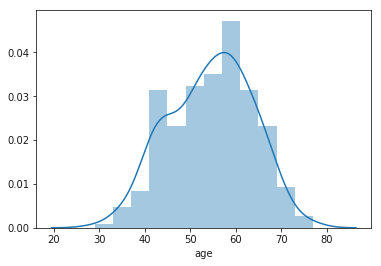

In [344]:
# sns.jointplot(x='sex', y='target', data=data);
age = data['age']
sns.distplot(age)

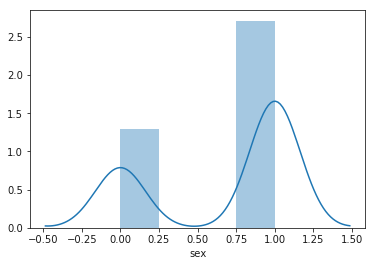

In [345]:
sex = data['sex']
sns.distplot(sex)

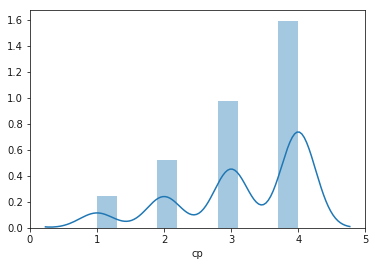

In [346]:
cp = data['cp']
sns.distplot(cp)

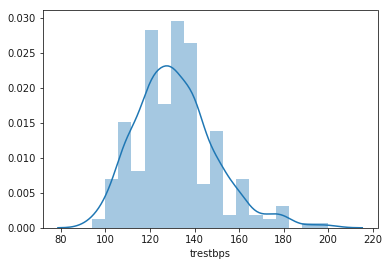

In [347]:
trestbps = data['trestbps']
sns.distplot(trestbps)

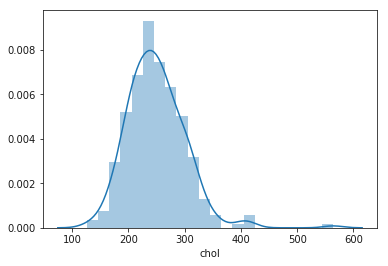

In [348]:
chol = data['chol']
sns.distplot(chol)

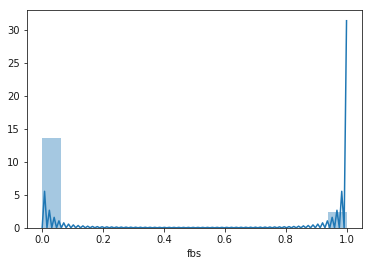

In [349]:
fbs = data['fbs']
sns.distplot(fbs)

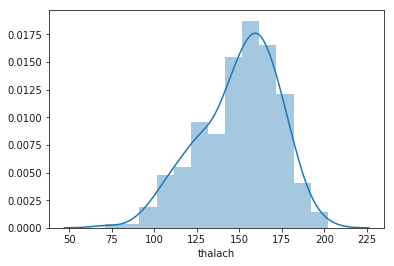

In [350]:
thalach = data['thalach']
sns.distplot(thalach)

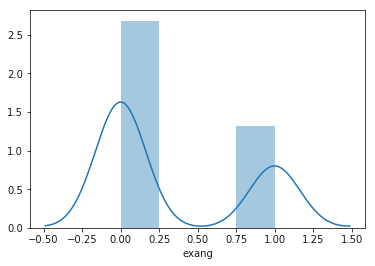

In [351]:
exang = data['exang']
sns.distplot(exang)

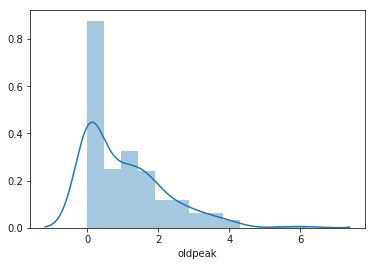

In [352]:
oldpeak = data['oldpeak']
sns.distplot(oldpeak)

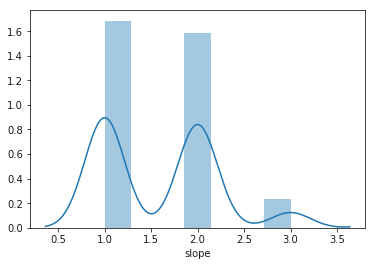

In [353]:
slope = data['slope']
sns.distplot(slope)

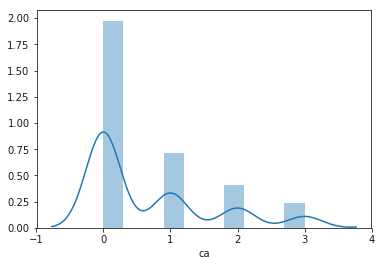

In [354]:
ca = data['ca']
sns.distplot(ca)

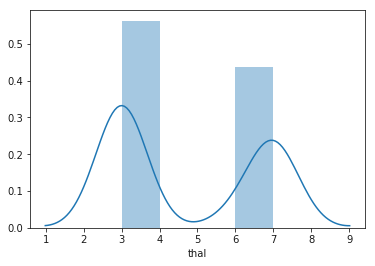

In [355]:
thal = data['thal']
sns.distplot(thal)

# TRAINING AND TESTING DATA

In [356]:
X = data.iloc[:,0:13].values
y = data.iloc[:,13].values

In [357]:
n = list(y).count(2)
n

120

In [358]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [359]:
n = list(y_test).count(1)
n

26

# NEURAL NETWORK

In [360]:
from sklearn.neural_network import MLPClassifier

c_nn = MLPClassifier(activation='relu', alpha=1e-5, hidden_layer_sizes=(40,30,20), random_state=19)
c_nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40, 30, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=19, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [361]:
from sklearn.metrics import confusion_matrix

nn_true = y_test
nn_pred = c_nn.predict(X_test)
confusion_matrix(nn_true, nn_pred)

array([[23,  3],
       [ 7, 21]], dtype=int64)

In [362]:
from sklearn.metrics import classification_report

nn_report = classification_report(nn_true, nn_pred)
print(nn_report)

              precision    recall  f1-score   support

         1.0       0.77      0.88      0.82        26
         2.0       0.88      0.75      0.81        28

   micro avg       0.81      0.81      0.81        54
   macro avg       0.82      0.82      0.81        54
weighted avg       0.82      0.81      0.81        54



In [363]:
from sklearn.metrics import roc_auc_score

roc_auc_score(nn_true, nn_pred)

0.8173076923076922

# SUPPORT VECTOR MACHINES

In [364]:
from sklearn import svm

c_svm = svm.SVC(gamma=0.001, probability=True)
c_svm.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [365]:
from sklearn.metrics import confusion_matrix

svm_true = y_test
svm_pred = c_svm.predict(X_test)
confusion_matrix(svm_true, svm_pred)

array([[22,  4],
       [13, 15]], dtype=int64)

In [366]:
from sklearn.metrics import classification_report

svm_report = classification_report(svm_true, svm_pred)
print(svm_report)

              precision    recall  f1-score   support

         1.0       0.63      0.85      0.72        26
         2.0       0.79      0.54      0.64        28

   micro avg       0.69      0.69      0.69        54
   macro avg       0.71      0.69      0.68        54
weighted avg       0.71      0.69      0.68        54



In [367]:
from sklearn.metrics import roc_auc_score

roc_auc_score(svm_true, svm_pred)

0.6909340659340658

# DECISION TREE

In [368]:
from sklearn.tree import DecisionTreeClassifier

c_dt = DecisionTreeClassifier(random_state=0)

c_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [369]:
from sklearn.metrics import confusion_matrix

dt_true = y_test
dt_pred = c_dt.predict(X_test)
confusion_matrix(dt_true, dt_pred)

array([[20,  6],
       [ 4, 24]], dtype=int64)

In [370]:
from sklearn.metrics import classification_report

dt_report = classification_report(dt_true, dt_pred)
print(dt_report)

              precision    recall  f1-score   support

         1.0       0.83      0.77      0.80        26
         2.0       0.80      0.86      0.83        28

   micro avg       0.81      0.81      0.81        54
   macro avg       0.82      0.81      0.81        54
weighted avg       0.82      0.81      0.81        54



In [371]:
from sklearn.metrics import roc_auc_score

roc_auc_score(dt_true, dt_pred)

0.8131868131868132

# RANDOM FOREST

In [372]:
from sklearn.ensemble import RandomForestClassifier

c_rf = RandomForestClassifier(n_estimators=100, max_depth=2,
                              random_state=0)
c_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [373]:
from sklearn.metrics import confusion_matrix

rf_true = y_test
rf_pred = c_rf.predict(X_test)
confusion_matrix(rf_true, rf_pred)

array([[25,  1],
       [ 6, 22]], dtype=int64)

In [374]:
from sklearn.metrics import classification_report

rf_report = classification_report(rf_true, rf_pred)
print(rf_report)

              precision    recall  f1-score   support

         1.0       0.81      0.96      0.88        26
         2.0       0.96      0.79      0.86        28

   micro avg       0.87      0.87      0.87        54
   macro avg       0.88      0.87      0.87        54
weighted avg       0.88      0.87      0.87        54



In [375]:
from sklearn.metrics import roc_auc_score

roc_auc_score(rf_true, rf_pred)

0.8736263736263735

# TES CATEGORICAL DATA

In [376]:
datacat = pd.read_csv('heartcat.dat', header=None)
datacat.columns = data_description['Name'].values
datacat.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,a4,female,cp4,rb2,sc2,fbs0,hyper,mh2,ang0,op2,flat,nmv3,normal,presence
1,a4,male,cp3,rb0,sc2,fbs0,hyper,mh2,ang0,op1,flat,nmv0,reversible,absence
2,a3,female,cp2,rb1,sc2,fbs0,norm,mh2,ang0,op0,up,nmv0,reversible,presence
3,a3,female,cp4,rb1,sc2,fbs0,norm,mh1,ang1,op0,flat,nmv1,reversible,absence
4,a4,male,cp2,rb1,sc2,fbs0,hyper,mh2,ang1,op0,up,nmv1,normal,absence


In [377]:
le = LabelEncoder()
encoded = datacat.apply(le.fit_transform)

In [378]:
Xx = encoded.iloc[:,0:13].values
yy = encoded.iloc[:,13].values

In [379]:
from sklearn.model_selection import train_test_split

Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, yy, test_size=0.2, random_state=10)

# CATEGORICAL DATA DAN NEURAL NETWORK

In [380]:
from sklearn.neural_network import MLPClassifier

cc_nn = MLPClassifier(activation='relu', alpha=1e-5, hidden_layer_sizes=(40,30,20), random_state=19)
cc_nn.fit(Xx_train, yy_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40, 30, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=19, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [381]:
from sklearn.metrics import confusion_matrix

cnn_true = yy_test
cnn_pred = cc_nn.predict(Xx_test)
confusion_matrix(cnn_true, cnn_pred)

array([[22,  4],
       [ 5, 23]], dtype=int64)

In [382]:
from sklearn.metrics import classification_report

cnn_report = classification_report(cnn_true, cnn_pred)
print(cnn_report)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        26
           1       0.85      0.82      0.84        28

   micro avg       0.83      0.83      0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54



# CATEGORICAL DATA DAN SVM

In [383]:
from sklearn import svm

cc_svm = svm.SVC(gamma=0.001, probability=True)
cc_svm.fit(Xx_train, yy_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [384]:
from sklearn.metrics import confusion_matrix

csvm_true = yy_test
csvm_pred = cc_svm.predict(Xx_test)
confusion_matrix(csvm_true, csvm_pred)

array([[26,  0],
       [27,  1]], dtype=int64)

In [385]:
from sklearn.metrics import classification_report

csvm_report = classification_report(csvm_true, csvm_pred)
print(csvm_report)

              precision    recall  f1-score   support

           0       0.49      1.00      0.66        26
           1       1.00      0.04      0.07        28

   micro avg       0.50      0.50      0.50        54
   macro avg       0.75      0.52      0.36        54
weighted avg       0.75      0.50      0.35        54



# CATEGORICAL DATA DAN DECISION TREE

In [386]:
from sklearn.tree import DecisionTreeClassifier

cc_dt = DecisionTreeClassifier(random_state=0)

cc_dt.fit(Xx_train, yy_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [387]:
from sklearn.metrics import confusion_matrix

cdt_true = yy_test
cdt_pred = cc_dt.predict(Xx_test)
confusion_matrix(cdt_true, cdt_pred)

array([[19,  7],
       [ 3, 25]], dtype=int64)

In [388]:
from sklearn.metrics import classification_report

cdt_report = classification_report(cdt_true, cdt_pred)
print(cdt_report)

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        26
           1       0.78      0.89      0.83        28

   micro avg       0.81      0.81      0.81        54
   macro avg       0.82      0.81      0.81        54
weighted avg       0.82      0.81      0.81        54



# CATEGORICAL DATA DAN RANDOM FOREST

In [389]:
from sklearn.ensemble import RandomForestClassifier

cc_rf = RandomForestClassifier(n_estimators=100, max_depth=2,
                              random_state=0)
cc_rf.fit(Xx_train, yy_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [390]:
from sklearn.metrics import confusion_matrix

crf_true = yy_test
crf_pred = cc_rf.predict(Xx_test)
confusion_matrix(crf_true, crf_pred)

array([[25,  1],
       [ 6, 22]], dtype=int64)

In [391]:
from sklearn.metrics import classification_report

crf_report = classification_report(crf_true, crf_pred)
print(crf_report)

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        26
           1       0.96      0.79      0.86        28

   micro avg       0.87      0.87      0.87        54
   macro avg       0.88      0.87      0.87        54
weighted avg       0.88      0.87      0.87        54



# COMPARE SCORE

In [392]:
from sklearn.metrics import accuracy_score, log_loss

classifiers = [MLPClassifier(activation='relu', alpha=1e-5, hidden_layer_sizes=(40,30,20), random_state=19),
               svm.SVC(gamma=0.001, probability=True),
               DecisionTreeClassifier(criterion='entropy', random_state=0), 
               RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)]

log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy: {:.4%}".format(acc))
    
    y_pred = clf.predict_proba(X_test)
    ll = log_loss(y_test, y_pred)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

MLPClassifier
****Results****
Accuracy: 81.4815%
Log Loss: 0.48369137279048274
SVC
****Results****
Accuracy: 68.5185%
Log Loss: 0.6312956751482189
DecisionTreeClassifier
****Results****
Accuracy: 75.9259%
Log Loss: 8.31489061358961
RandomForestClassifier
****Results****
Accuracy: 87.0370%
Log Loss: 0.4574798352750128


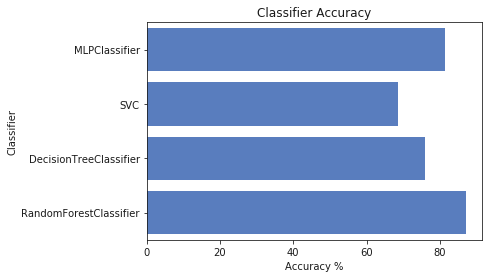

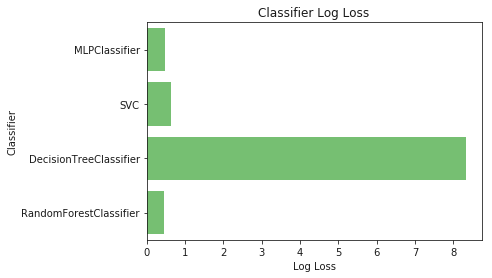

In [393]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [394]:
classifiers2 = [MLPClassifier(activation='relu', alpha=1e-5, hidden_layer_sizes=(40,30,20), random_state=19),
               svm.SVC(gamma=0.001, probability=True),
               DecisionTreeClassifier(criterion='entropy', random_state=0), 
               RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)]

log_cols=["Classifier", "Accuracy", "Log Loss"]
log2 = pd.DataFrame(columns=log_cols)

for clf in classifiers2:
    clf.fit(Xx_train, yy_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    yy_pred = clf.predict(Xx_test)
    acc = accuracy_score(yy_test, yy_pred)
    print("Accuracy: {:.4%}".format(acc))
    
    yy_pred = clf.predict_proba(X_test)
    ll = log_loss(yy_test, yy_pred)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log2 = log2.append(log_entry)
    
print("="*30)


MLPClassifier
****Results****
Accuracy: 83.3333%
Log Loss: 14.071388524600005
SVC
****Results****
Accuracy: 50.0000%
Log Loss: 1.038019698255141
DecisionTreeClassifier
****Results****
Accuracy: 75.9259%
Log Loss: 18.54860213800759
RandomForestClassifier
****Results****
Accuracy: 87.0370%
Log Loss: 0.5683373192529836


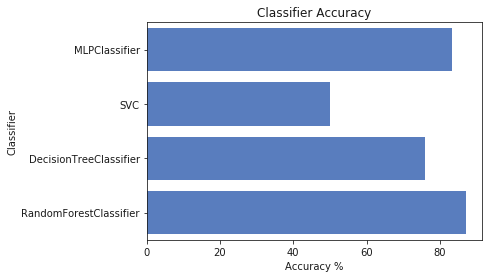

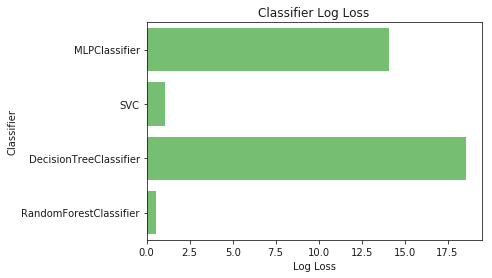

In [395]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log2, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log2, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()